
--- Simulação 1: Campo no centro do cubo ---


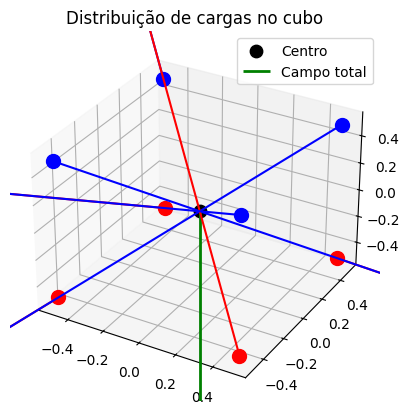

Campo elétrico: Ex = 0.00e+00 N/C, Ey = 0.00e+00 N/C, Ez = -5.53e+10 N/C

--- Simulação 2: Campo devido à lâmina no ponto (1,1,1) ---
Campo elétrico: Ex = -5.95e+01 N/C, Ey = -3.41e+01 N/C, Ez = 2.30e+02 N/C

--- Plotando vetores de campo e mapa de densidade ---


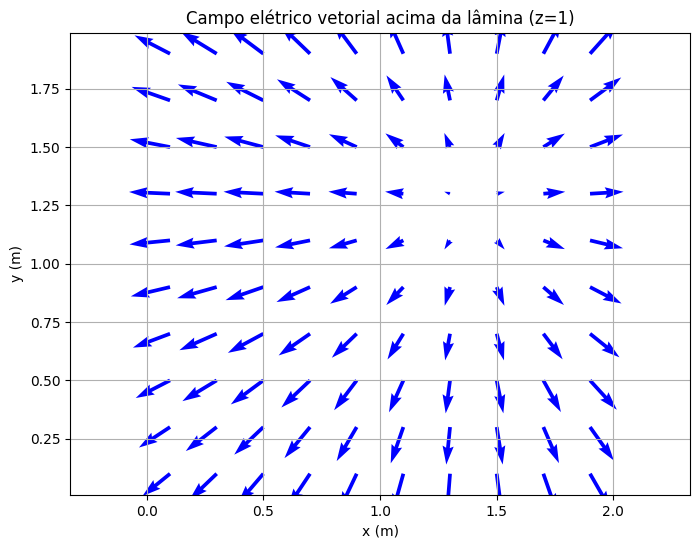

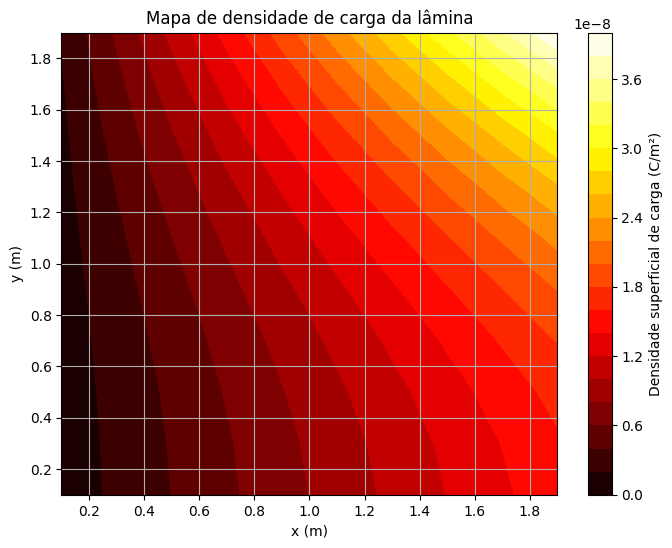

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D

# ---------- SIMULAÇÃO 1: Campo elétrico no centro do cubo ----------
def campo_cubo(plot=True):
    k = 1 / (4 * np.pi * epsilon_0)
    s = 1  # lado do cubo em metros
    q = 1  # módulo da carga

    # Coordenadas dos vértices do cubo
    coords = [
        (x, y, z)
        for x in [-0.5, 0.5]
        for y in [-0.5, 0.5]
        for z in [-0.5, 0.5]
    ]

    # Distribuição alternada de cargas: 4 positivas, 4 negativas
    cargas = [q if i % 2 == 0 else -q for i in range(8)]

    E_total = np.array([0.0, 0.0, 0.0])
    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title("Distribuição de cargas no cubo")

    for pos, carga in zip(coords, cargas):
        r = np.array(pos)
        r_mod = np.linalg.norm(r)
        E = k * carga * r / (r_mod**3)
        E_total += E

        if plot:
            color = 'r' if carga > 0 else 'b'
            ax.scatter(*r, color=color, s=100)
            ax.quiver(*r, *(-E), length=0.3, color=color)

    if plot:
        ax.scatter(0, 0, 0, color='k', s=80, label='Centro')
        ax.quiver(0, 0, 0, *E_total, color='g', linewidth=2, label='Campo total')
        ax.legend()
        plt.show()

    return E_total

# ---------- SIMULAÇÃO 2: Integração sobre lâmina ----------
def campo_lamina(ponto_obs=np.array([1.0, 1.0, 1.0])):
    k = 1 / (4 * np.pi * epsilon_0)

    def densidade(x, y):
        return 1e-9 * x * (y**2 + 4)**(1.5)  # C/m²

    def integrando(x, y):
        r = ponto_obs - np.array([x, y, 0])
        r_mod = np.linalg.norm(r)
        dE = densidade(x, y) * r / (r_mod**3)
        return dE

    def integrando_x(x, y): return integrando(x, y)[0]
    def integrando_y(x, y): return integrando(x, y)[1]
    def integrando_z(x, y): return integrando(x, y)[2]

    Ex, _ = dblquad(integrando_x, 0, 2, lambda x: 0, lambda x: 2)
    Ey, _ = dblquad(integrando_y, 0, 2, lambda x: 0, lambda x: 2)
    Ez, _ = dblquad(integrando_z, 0, 2, lambda x: 0, lambda x: 2)

    E = k * np.array([Ex, Ey, Ez])
    return E

# ---------- Geração de mapa de densidade e campo vetorial ----------
def plot_lamina():
    k = 1 / (4 * np.pi * epsilon_0)
    X, Y = np.meshgrid(np.linspace(0.1, 1.9, 10), np.linspace(0.1, 1.9, 10))
    Z = np.zeros_like(X)
    Ex_total = np.zeros_like(X)
    Ey_total = np.zeros_like(X)
    Ez_total = np.zeros_like(X)

    def densidade(x, y):
        return 1e-9 * x * (y**2 + 4)**(1.5)  # C/m²

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            ponto_obs = np.array([X[i, j], Y[i, j], 1.0])

            def integrando(x, y):
                r = ponto_obs - np.array([x, y, 0])
                r_mod = np.linalg.norm(r)
                dE = densidade(x, y) * r / (r_mod**3)
                return dE

            def integrando_x(x, y): return integrando(x, y)[0]
            def integrando_y(x, y): return integrando(x, y)[1]
            def integrando_z(x, y): return integrando(x, y)[2]

            Ex, _ = dblquad(integrando_x, 0, 2, lambda x: 0, lambda x: 2)
            Ey, _ = dblquad(integrando_y, 0, 2, lambda x: 0, lambda x: 2)
            Ez, _ = dblquad(integrando_z, 0, 2, lambda x: 0, lambda x: 2)

            Ex_total[i, j] = k * Ex
            Ey_total[i, j] = k * Ey
            Ez_total[i, j] = k * Ez

    plt.figure(figsize=(8, 6))
    plt.quiver(X, Y, Ex_total, Ey_total, color='blue')
    plt.title("Campo elétrico vetorial acima da lâmina (z=1)")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    plt.figure(figsize=(8, 6))
    dens = densidade(X, Y)
    plt.contourf(X, Y, dens, levels=20, cmap='hot')
    plt.colorbar(label='Densidade superficial de carga (C/m²)')
    plt.title("Mapa de densidade de carga da lâmina")
    plt.xlabel("x (m)")
    plt.ylabel("y (m)")
    plt.grid(True)
    plt.show()

# ---------- Execução ----------
if __name__ == "__main__":
    print("\n--- Simulação 1: Campo no centro do cubo ---")
    E1 = campo_cubo()
    print(f"Campo elétrico: Ex = {E1[0]:.2e} N/C, Ey = {E1[1]:.2e} N/C, Ez = {E1[2]:.2e} N/C")

    print("\n--- Simulação 2: Campo devido à lâmina no ponto (1,1,1) ---")
    E2 = campo_lamina()
    print(f"Campo elétrico: Ex = {E2[0]:.2e} N/C, Ey = {E2[1]:.2e} N/C, Ez = {E2[2]:.2e} N/C")

    print("\n--- Plotando vetores de campo e mapa de densidade ---")
    plot_lamina()